# Introduction

This notebook analyzes data collected from a survey to determine the factors influencing drivers' acceptance of coupons in various driving scenarios. The data encompasses different aspects such as destination, current time, weather, presence of passengers, and coupon types (e.g., restaurants, coffee houses, bars). The goal is to leverage visualizations and probability distributions to distinguish between customers who accepted a driving coupon and those who did not.

Key Questions:
- What are the primary factors influencing coupon acceptance?
- How do different scenarios impact the likelihood of accepting a coupon?
- Focus on Bar coupon and Coffee House coupon

Let's delve into the data exploration and analysis to uncover insights into driver behavior regarding coupon acceptance.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data loading and overview 

1. Read in the `coupons.csv` file.

In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
#checking the different values of columns to see any problematic data
data['destination'].value_counts()

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

In [7]:
data['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [8]:
data['weather'].value_counts()

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

In [9]:
data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [10]:
data['time'].value_counts()

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

In [11]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [12]:
data['expiration'].value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [13]:
data['gender'].value_counts()

gender
Female    6511
Male      6173
Name: count, dtype: int64

In [14]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [15]:
data['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [16]:
data['has_children'].value_counts()

has_children
0    7431
1    5253
Name: count, dtype: int64

In [17]:
data['education'].value_counts()

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64

In [18]:
data['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [19]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [20]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [21]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [22]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [23]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [24]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [25]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [26]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [27]:
data['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [28]:
data['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [29]:
data['direction_same'].value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [30]:
data['direction_opp'].value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

In [31]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

*Data don't look problematic*

In [32]:
# Count missing values in each column
missing_data_count = data.isnull().sum()
print(missing_data_count)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


*There is missing data on user's car, and user's habits on food*

# Data cleaning & Preprocessnig

3. Decide what to do about your missing data -- drop, replace, other...

As there is 12684 rows in total, the column `car` with 12576 won't be used, because there is too few filled.

Because, I don't want to remove lines from the dataset, I choose to add an "Unknown" category when we have no data on the other columns.

In [35]:
# deletion of the useless column car
data = data.drop('car', axis=1)
# renaming empty value by Unknown
data = data.fillna('Unknown')
# renaming of values and columns for clarity and ease of use
data = data.copy()
data.loc[data['direction_same'] == 0, 'direction_same'] = 'opposite'
data.loc[data['direction_same'] == 1, 'direction_same'] = 'same'
data.loc[data['Y'] == 0, 'Y'] = 'Rejected'
data.loc[data['Y'] == 1, 'Y'] = 'Accepted'
data.rename(columns={'passanger': 'passenger'}, inplace=True)
data.rename(columns={'direction_same': 'direction'}, inplace=True)
# deletion of useless column
data = data.drop(columns=['direction_opp'])

Saving the preprocessed data into a new csv

In [36]:
data.to_csv('data/cleaned_coupons.csv', index=False)

# Exploratory data analysis

## Global exploration

4. What proportion of the total observations chose to accept the coupon? 

In [39]:
df = data.copy()

# Count the occurrences of each unique value in the 'Y' column
acceptance_counts = df[df['Y'] == 'Accepted'].shape[0]

# Calculate the proportion of customers who accepted the coupon (Y = 1)
proportion_accepted = acceptance_counts / len(df)

print(f"Proportion of customers who accepted the coupon: {proportion_accepted:.2%}")

Proportion of customers who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

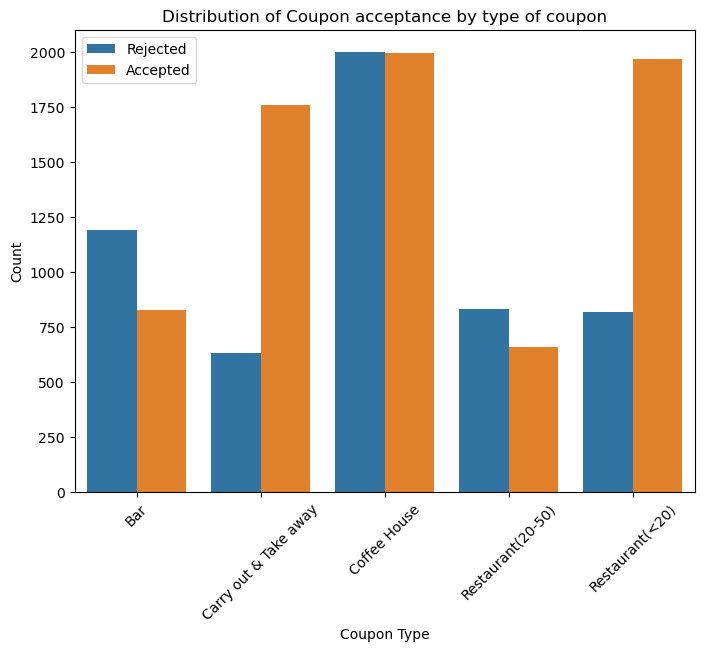

In [55]:
# Build the bar plot with Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df.sort_values('coupon'), x='coupon', hue='Y')

# Update titles and labels
plt.title('Distribution of Coupon acceptance by type of coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# Change the legend labels
plt.legend(title='')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

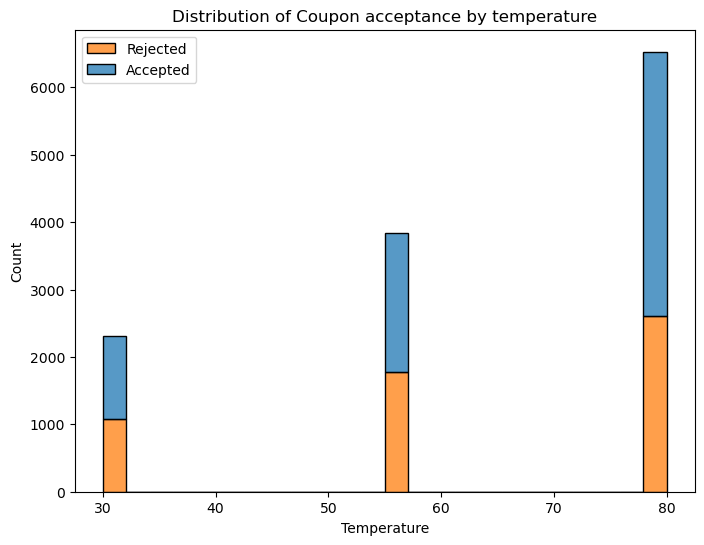

In [53]:
# Build the histogram plot with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='temperature', hue='Y', multiple='stack')

# Update titles and labels
plt.title('Distribution of Coupon acceptance by temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Change the legend labels
plt.legend(title='', labels=['Rejected', 'Accepted'])

# Display the plot
plt.show()

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [72]:
bar_df = df.query('coupon == "Bar"')
bar_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,1,0,opposite,Rejected
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,0,0,same,Accepted
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,1,1,opposite,Rejected
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,opposite,Accepted
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,same,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,opposite,Rejected
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,opposite,Rejected
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,opposite,Rejected
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,opposite,Rejected


2. What proportion of bar coupons were accepted?


In [462]:
# Count the occurrences of each unique value in the 'Y' column
acceptance_counts = bar_df.query('Y == 1')['Y'].sum()
print(f"Number of customers who accepted the coupon: {acceptance_counts}")
print(f"Total of customers who get the Bar coupon proposed: {len(bar_df)}")

# Calculate the proportion of customers who accepted the coupon (Y = 1)
proportion_accepted = acceptance_counts / len(bar_df)

print(f"Proportion of customers who accepted the coupon: {proportion_accepted:.2%}")

Number of customers who accepted the coupon: 827
Total of customers who get the Bar coupon proposed: 2017
Proportion of customers who accepted the coupon: 41.00%


### 41% of customers accepted the bar coupon

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [89]:
# this function calculate the acceptance rate for a specific query and for a specific dataset
# and display the result
def calculate_acceptance_rate(query, data):
    filtered_df = data.query(query)
    # Calculate the count of 'Accepted' for the specified conditions
    acceptance_counts = (filtered_df['Y'] == 'Accepted').sum()
    # Calculate the total count for the specified conditions 
    total = len(filtered_df)
    # Calculate the proportion of customers who accepted the coupon (Y = 1) for those 
    proportion_accepted = acceptance_counts / total
    print(f"Acceptance rate: {proportion_accepted:.1%}")


In [95]:
print('Drivers who went to a bar 3 or fewer times a month ')
fewTimes = {'never', 'less1', '1~3'}
calculate_acceptance_rate('Bar in @fewTimes', bar_df)
print('')
print('Drivers who went to a bar 4 or more times a month ')
aLotTimes= {'4~8','gt8'}
calculate_acceptance_rate('Bar in @aLotTimes', bar_df)

Drivers who went to a bar 3 or fewer times a month 
Acceptance rate: 37.1%

Drivers who went to a bar 4 or more times a month 
Acceptance rate: 76.9%


### But only 37% accepted for those who go fewer times to a bar compared to 77% for those who go a lot of times to a bar

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [94]:
# Custom function to handle '50plus' and 'below21' values in age column of data
def age_converter(value):
    if value == '50plus':
        return 51  # Assuming '50plus' represents more than 50 years old
    elif value == 'below21':
        return 20  # Assuming 'below21' represents less than 21 years old
    else:
        return pd.to_numeric(value, errors='coerce')

# Apply the custom function to the 'age' column
bar_df.loc[:, 'age'] = bar_df['age'].apply(age_converter)

print('Drivers who go to a bar more than once a month and are over the age of 25 ')
#  Build the query 
barHabitSelection= {'1~3', '4~8', 'gt8'}
query = 'Bar in @barHabitSelection and age > 25'
calculate_acceptance_rate(query, bar_df)
print('')
print('All other drivers')
query = '~(' + query + ')'
calculate_acceptance_rate(query, bar_df)

Drivers who go to a bar more than once a month and are over the age of 25 
Acceptance rate: 69.5%

All other drivers
Acceptance rate: 33.5%


### The acceptance rate for the drivers who go to a bar MORE than once a month and are OVER the age of 25 is 70% while the acceptance rate for the drivers who go to a bar LESS than once a month or are UNDER the age of 25 is 34%. This is a big difference.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [97]:
print('Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry ')
# Build the query
barHabitSelection  = {'1~3', '4~8', 'gt8'}
passengerSelection = {'Kid(s)', 'Alone'} 
query = 'Bar in @barHabitSelection and passenger in @passengerSelection and occupation != "Farming Fishing & Forestry"'
calculate_acceptance_rate(query, bar_df)
print('')
print('All other drivers')
query = '~(' + query + ')'
calculate_acceptance_rate(query, bar_df)

Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 
Acceptance rate: 67.3%

All other drivers
Acceptance rate: 34.5%


### The proportion of customers who accepted the coupon and who go to bars MORE than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 67.33%
### While the proportion of customers who accepted the coupon and who go to bars LESS than once a month or had no passengers or passengers that were kid(s) or had a farming, fishing, or forestry occupation is only 34.47%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [100]:
print('Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed')
# Build the query
barHabitSelection  = {'1~3', '4~8', 'gt8'}
passengerSelection = {'Kid(s)', 'Alone'} 
query = 'Bar in @barHabitSelection and passenger in @passengerSelection and maritalStatus != "Widowed"'
calculate_acceptance_rate(query, bar_df)
print('All other drivers')
query = '~(' + query + ')'
calculate_acceptance_rate(query, bar_df)

print('')
print('Drivers who go to bars more than once a month and are under the age of 30')
# Build the query
query = 'Bar in @barHabitSelection and age < 30'
calculate_acceptance_rate(query, bar_df)
print('All other drivers')
query = '~(' + query + ')'
calculate_acceptance_rate(query, bar_df)

print('')
print('Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K')
# Build the query
cheapRestaurantSelection = {'4~8','gt8'}
incomeSelection = {'Less than $12500','$12500 - $24999','$25000 - $37499', '$37500 - $49999'}
query = 'RestaurantLessThan20 in @cheapRestaurantSelection and income in @incomeSelection'
calculate_acceptance_rate(query, bar_df)
print('All other drivers')
query = '~(' + query + ')'
calculate_acceptance_rate(query, bar_df)

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
Acceptance rate: 67.3%
All other drivers
Acceptance rate: 34.5%

Drivers who go to bars more than once a month and are under the age of 30
Acceptance rate: 72.2%
All other drivers
Acceptance rate: 34.6%

Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
Acceptance rate: 45.3%
All other drivers
Acceptance rate: 40.1%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Drivers who accepts Bar coupons are most likely the ones who used to go often to bars (more than 4 times a month). 

### Some criteria and habits increase the acceptance rate such as having passengers (except kids), being young (<30 years old), marital_status (not being widowed)

### Others criteria such as habits on frequency to go to cheap restaurant and income doesn't impact much the acceptance rate.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigating Coffee House coupon

### What is the profile of customers who accept the coffee house coupon ?

In [101]:
# Restrict the data to the coupon Coffee House for this analysis
coffee_df = df.query('coupon == "Coffee House"')
coffee_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,0,0,opposite,Rejected
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,1,0,opposite,Rejected
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,1,0,opposite,Rejected
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,1,0,opposite,Accepted
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,Unknown,4~8,1~3,1,0,0,opposite,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,less1,never,4~8,gt8,less1,1,1,0,opposite,Rejected
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,less1,never,4~8,gt8,less1,1,0,0,same,Rejected
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,same,Rejected
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,opposite,Rejected


In [102]:
# Count the occurrences of each unique value in the 'Y' column
acceptance_counts = coffee_df[coffee_df['Y'] == 'Accepted'].shape[0]
print(f"Number of customers who accepted the coupon: {acceptance_counts}")
print(f"Total of customers who get the Coffee House coupon proposed: {len(coffee_df)}")

# Calculate the proportion of customers who accepted the coupon
proportion_accepted = acceptance_counts / len(coffee_df)

print(f"Proportion of customers who accepted the coupon: {proportion_accepted:.2%}")

Number of customers who accepted the coupon: 1995
Total of customers who get the Coffee House coupon proposed: 3996
Proportion of customers who accepted the coupon: 49.92%


In [567]:
# Group by context columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['destination'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'
grouped_df = grouped_df.sort_values('acceptance_rate', ascending=False)
grouped_df

Y,destination,Accepted,Rejected,total_count,acceptance_rate
1,No Urgent Place,1187,866,2053,57.8%
2,Work,385,490,875,44.0%
0,Home,322,566,888,36.3%


In [568]:
# Group by context columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['passenger'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'
grouped_df = grouped_df.sort_values('acceptance_rate', ascending=False)
grouped_df

Y,passenger,Accepted,Rejected,total_count,acceptance_rate
1,Friend(s),702,473,1175,59.7%
3,Partner,165,126,291,56.7%
2,Kid(s),91,102,193,47.2%
0,Alone,936,1221,2157,43.4%


In [569]:
# Group by context columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['time'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'
grouped_df = grouped_df.sort_values('acceptance_rate', ascending=False)
grouped_df

Y,time,Accepted,Rejected,total_count,acceptance_rate
0,10AM,544,313,857,63.5%
2,2PM,414,345,759,54.5%
4,7AM,385,490,875,44.0%
1,10PM,121,161,282,42.9%
3,6PM,430,613,1043,41.2%


In [570]:
# Group by context columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['direction'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'
grouped_df

Y,direction,Accepted,Rejected,total_count,acceptance_rate
0,opposite,1517,1583,3100,48.9%
1,same,377,339,716,52.7%


In [571]:
# Group by context columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['expiration'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'
grouped_df

Y,expiration,Accepted,Rejected,total_count,acceptance_rate
0,1d,983,710,1693,58.1%
1,2h,911,1212,2123,42.9%


In [572]:
# Just weather
# Group by user columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['weather'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1)
grouped_df

Y,weather,Accepted,Rejected,total_count,acceptance_rate
0,Rainy,111,104,215,51.6
1,Snowy,122,163,285,42.8
2,Sunny,1661,1655,3316,50.1


#### Contextually, 
- drivers with passengers but not kid(s) have a good acceptance rate
- commit during late morning have the best acceptance rate
- drivers going to a no urgent place have the best acceptance rate
- coupons which expire in 1 day have a better acceptance rate than 2 hours coupon
- a sunny day give an equal chance for the coupon to be accepted. But a rainy day as a better chance to be accepted compared to a snowy day. 

In [573]:
# Just gender
# Group by user columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['gender'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

grouped_df

Y,gender,Accepted,Rejected,total_count,acceptance_rate
0,Female,967,1002,1969,49.1%
1,Male,927,920,1847,50.2%


In [574]:
# Just maritalStatus
# Group by user columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['maritalStatus'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

grouped_df

Y,maritalStatus,Accepted,Rejected,total_count,acceptance_rate
0,Divorced,74,69,143,51.7%
1,Married partner,720,746,1466,49.1%
2,Single,770,727,1497,51.4%
3,Unmarried partner,318,358,676,47.0%
4,Widowed,12,22,34,35.3%


In [575]:
# Just has_children
# Group by user columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['has_children'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

grouped_df

Y,has_children,Accepted,Rejected,total_count,acceptance_rate
0,0,1184,1176,2360,50.2%
1,1,710,746,1456,48.8%


In [576]:
# Just age
# Map the grouped age categories
age_mapping = {
    'below21': 'below21',
    '21': '21-26',
    '26': '21-26',
    '31': '31-36',
    '36': '31-36',
    '41': '41-46',
    '46': '41-46',
    '50plus': '50plus'
}

# Apply the mapping to create a new column 'grouped_age'
coffee_df['grouped_age'] = coffee_df['age'].map(age_mapping)

# Group by user columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['grouped_age'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1)

# Excluding data with a number of data too little to be compared ( here using 100 total count as minimum)
grouped_df = grouped_df[grouped_df['total_count'] > 100].sort_values('acceptance_rate', ascending=False)
grouped_df


Y,grouped_age,Accepted,Rejected,total_count,acceptance_rate
4,below21,97,46,143,67.8
0,21-26,846,795,1641,51.6
2,41-46,266,268,534,49.8
1,31-36,463,506,969,47.8
3,50plus,222,307,529,42.0


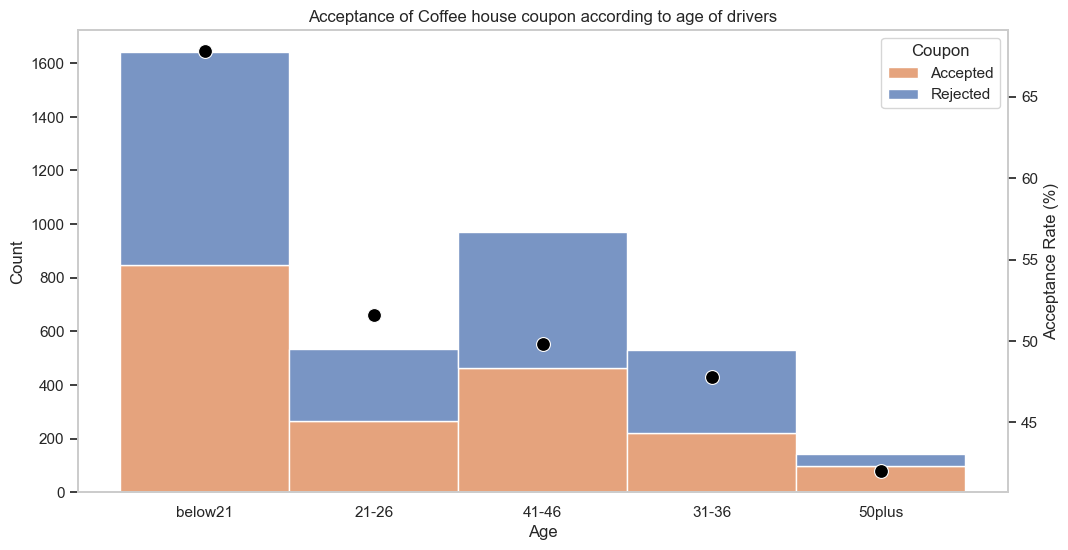

In [577]:
# Specify the order of x-axis categories
category_order = ['below21', '21-26', '31-36', '41-46', '50plus']

# Create the histogram for 'coffee_df' using sns
plt.figure(figsize=(12, 6))

# Set title
plt.title('Acceptance of Coffee house coupon according to age of drivers')
ax1 = sns.histplot(data=coffee_df, 
                   x="grouped_age", 
                   hue="Y", 
                   multiple="stack"
                  )
# Set legend
plt.legend(title='Coupon', loc='upper right', labels=['Accepted', 'Rejected'])

# Overlay the acceptance rate on the same plot using sns scatterplot
ax2 = ax1.twinx()
sns.scatterplot(data=grouped_df, x='grouped_age', y='acceptance_rate', color='black', ax=ax2, s=100)

# Turns off grid on both Axis
ax1.grid(False)
ax2.grid(False)

# Set labels
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax2.set_ylabel('Acceptance Rate (%)')


# Show the plot
plt.show()

#### On the user profile:
- There is no clear pattern about customers regarding the gender, marital status or children criteria
- Divorced or single people have a slight better acceptance rate than others
- Younger drivers are most likely to accept the coupon rather than older drivers

In [558]:
# Analysis on habits
# Map the grouped categories
# I used 2 differents mappings to have more equal number of few / a lot 
habits_mapping_1 = {
    'never': 'few',
    'less1': 'few',
    '1~3': 'few',
    '4~8': 'a lot',
    'gt8': 'a lot'
}
habits_mapping_2 = {
    'never': 'few',
    'less1': 'few',
    '1~3': 'a lot',
    '4~8': 'a lot',
    'gt8': 'a lot'
}

# Drop unknown habits values 
coffee_df = coffee_df[coffee_df['Bar'] != 'Unknown']
coffee_df = coffee_df[coffee_df['CoffeeHouse'] != 'Unknown']
coffee_df = coffee_df[coffee_df['CarryAway'] != 'Unknown']
coffee_df = coffee_df[coffee_df['RestaurantLessThan20'] != 'Unknown']
coffee_df = coffee_df[coffee_df['Restaurant20To50'] != 'Unknown']
 
# Apply the mapping to create a new column 'grouped_...'
coffee_df['grouped_Bar'] = coffee_df['Bar'].map(habits_mapping_2)
coffee_df['grouped_CoffeeHouse'] = coffee_df['CoffeeHouse'].map(habits_mapping_2)
coffee_df['grouped_CarryAway'] = coffee_df['CarryAway'].map(habits_mapping_1)
coffee_df['grouped_RestaurantLessThan20'] = coffee_df['RestaurantLessThan20'].map(habits_mapping_1)
coffee_df['grouped_Restaurant20To50'] = coffee_df['Restaurant20To50'].map(habits_mapping_2)

print(coffee_df['grouped_Bar'].value_counts())
print(coffee_df['grouped_CoffeeHouse'].value_counts())
print(coffee_df['grouped_CarryAway'].value_counts())
print(coffee_df['grouped_RestaurantLessThan20'].value_counts())
print(coffee_df['grouped_Restaurant20To50'].value_counts())

grouped_Bar
few      2612
a lot    1204
Name: count, dtype: int64
grouped_CoffeeHouse
few      1948
a lot    1868
Name: count, dtype: int64
grouped_CarryAway
few      2038
a lot    1778
Name: count, dtype: int64
grouped_RestaurantLessThan20
few      2293
a lot    1523
Name: count, dtype: int64
grouped_Restaurant20To50
few      2500
a lot    1316
Name: count, dtype: int64


In [578]:
# Group by user habits columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['grouped_CoffeeHouse'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

# Excluding data with a number of data too little to be compared ( here using 100 total count as minimum)
grouped_df = grouped_df[grouped_df['total_count']>100].sort_values('acceptance_rate', ascending=False)
grouped_df

Y,grouped_CoffeeHouse,Accepted,Rejected,total_count,acceptance_rate
0,a lot,1231,637,1868,65.9%
1,few,663,1285,1948,34.0%


In [579]:
# Group by user habits columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['grouped_Bar'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

# Excluding data with a number of data too little to be compared ( here using 100 total count as minimum)
grouped_df = grouped_df[grouped_df['total_count']>100].sort_values('acceptance_rate', ascending=False)
grouped_df

Y,grouped_Bar,Accepted,Rejected,total_count,acceptance_rate
0,a lot,605,599,1204,50.2%
1,few,1289,1323,2612,49.3%


In [580]:
# Group by user habits columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['grouped_CarryAway'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

# Excluding data with a number of data too little to be compared ( here using 100 total count as minimum)
grouped_df = grouped_df[grouped_df['total_count']>100].sort_values('acceptance_rate', ascending=False)
grouped_df

Y,grouped_CarryAway,Accepted,Rejected,total_count,acceptance_rate
0,a lot,904,874,1778,50.8%
1,few,990,1048,2038,48.6%


In [581]:
# Group by user habits columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['grouped_RestaurantLessThan20'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

# Excluding data with a number of data too little to be compared ( here using 100 total count as minimum)
grouped_df = grouped_df[grouped_df['total_count']>100].sort_values('acceptance_rate', ascending=False)
grouped_df

Y,grouped_RestaurantLessThan20,Accepted,Rejected,total_count,acceptance_rate
0,a lot,786,737,1523,51.6%
1,few,1108,1185,2293,48.3%


In [582]:
# Group by user habits columns and calculate the count for each value in 'Y' within each group
grouped_df = coffee_df.groupby(['grouped_Restaurant20To50'])['Y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the acceptance_rate for each group
grouped_df['total_count'] = grouped_df['Rejected'] + grouped_df['Accepted']
grouped_df['acceptance_rate'] = (grouped_df['Accepted'] / grouped_df['total_count'] * 100).round(1).astype(str) + '%'

# Excluding data with a number of data too little to be compared ( here using 100 total count as minimum)
grouped_df = grouped_df[grouped_df['total_count']>100].sort_values('acceptance_rate', ascending=False)
grouped_df

Y,grouped_Restaurant20To50,Accepted,Rejected,total_count,acceptance_rate
0,a lot,700,616,1316,53.2%
1,few,1194,1306,2500,47.8%


#### Concerning the user habits:
- a driver who goes often to a coffee house (more than once a month) has a better acceptance rate
- a driver who goes fewer to the other places has a slight better acceptance rate but it's not significant

In [594]:
# Count the occurrences of each unique value in the 'Y' column for those 
passengerSelection = {'Friend(s)', 'Partner'}
ageSelection = {'below21', '21-26'}

query  = 'grouped_CoffeeHouse == "a lot" '
query += 'and passenger in @passengerSelection '
query += 'and time == "10AM" '
query += 'and expiration == "1d" '
query += 'and grouped_age in @ageSelection '
query += 'and destination == "No Urgent Place" '

# Apply the query to filter the DataFrame
filtered_df1 = coffee_df.query(query)
filtered_df2 = coffee_df.query('~(' + query + ')')

In [595]:
# Calculate the sum of 'Y' for the specified conditions
acceptance_counts1 = (filtered_df1['Y'] == 'Accepted').sum()
acceptance_counts2 = (filtered_df2['Y'] == 'Accepted').sum()

# Total of drivers
# who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry (1) and others (2)
total1 = len(filtered_df1)
total2 = len(filtered_df2)

# Calculate the proportion of customers who accepted the coupon (Y = 1) for those 
# who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry (1) and others (2)
proportion_accepted1 = acceptance_counts1 / total1
proportion_accepted2 = acceptance_counts2 / total2

print(f"Proportion of customers who accepted the coupon in selection: {proportion_accepted1:.2%}")
print(f"Proportion of customers who accepted the coupon not in selection: {proportion_accepted2:.2%}")

Proportion of customers who accepted the coupon in selection: 84.00%
Proportion of customers who accepted the coupon not in selection: 49.41%


#### The acceptance rate is very high (84%) for this target:
- young drivers (under 30 years old)
- drivers who use to go at least once a month in a coffee house
- drivers with passengers other than kid(s)
- drivers who drive to a No Urgent Place
- at 10AM
- with a coupon which expire in 1 day

#### Drivers which are not entering in that selection have a fair rate of acceptance (49%)